Introduction to PyTorch for NLP1
==========================



This notebook is meant to give a short introduction to PyTorch basics.

If, before or during we dive into PyTorch, you would like to read a bit more about neural networks in general, then [have a look here](http://ufldl.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/).


**You do not have to hand in this tutorial.** It is just to help you get started with PyTorch and neural networks.

Before you continue, check if you have the correct runtime:

> `Runtime -> Change runtime type`

It should be Python 3 with GPU.

Before you continue, please make a copy of this notebook to make it editable.

### Installing PyTorch

Now, let's install PyTorch:

In [ ]:
# http://pytorch.org/
import torch

torch-0.4.1-cp37-cp37m-linux_x86_64.whl is not a supported wheel on this platform.


In [ ]:
# should say 0.4.1
torch.__version__

'0.4.1'

### Random Seed

We can set a seed so that we get the same random values each time we re-run the notebook.
We will use seed [42](https://goo.gl/S3wrAV) here. 

In [4]:
torch.manual_seed(42)

### Tensors

Tensors are the Torch equivalent of **Numpy arrays**, but crucially, they can also be used on a GPU (graphics card). This can make your calculations a lot faster.

Since they are so similar, you can actually **convert** most tensors to Numpy arrays (and back), but we won't need to do that so often.

Working with PyTorch, we will need lots of tensors of various shapes.
For example, if we want to transform an input vector $\mathbf{x}$, we will need a weight matrix $W$.

**Note:** "Tensor" is a general name. A 1-D tensor is also called a **vector**, a 2-D tensor a **matrix**.



In [5]:
# create *uninitialized* 3-D tensor (values can be anything that is in memory!)
x = torch.Tensor(2, 3, 3)
print(x)

tensor([[[ 0.0000e+00,  2.0000e+00,  2.1485e-02],
         [ 2.5250e-29, -3.9731e+05,  4.5900e-41],
         [ 8.1717e+20,  1.3089e+22,  1.4498e-21]],

        [[ 5.0307e-43, -5.9754e+05,  4.5900e-41],
         [ 8.9683e-44,  3.6902e+19,  2.1491e-02],
         [ 3.6902e+19,  0.0000e+00,  2.0000e+00]]])


In [6]:
# a randomly initialized 2-D tensor (a matrix)
x = torch.rand(4, 3)
print(x)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936]])


In [7]:
# how to get its size
print(x.size())

torch.Size([4, 3])


In [8]:
# or if you know there are 2 dimensions:
time, dim = x.size()
print(time, dim)

4 3


### Operations

#### Adding

In [9]:
# You can add tensors in many ways. 
# The easiest is to simply use a python + operator:
y = torch.rand(4, 3)
print(x + y)

# But you can also use torch.add:
print(torch.add(x, y))

# Provide an output Tensor and save the result there:
result = torch.Tensor(4, 3)
torch.add(x, y, out=result)
print(result)

# Or add in-place (this changes y!)
# Note: Any operation that mutates a tensor in-place is post-fixed with an "_", like "add_" here.
y.add_(x)
print(y)

tensor([[1.7517, 1.4827, 1.1240],
        [1.3887, 1.2759, 1.1748],
        [0.5232, 1.4211, 1.2104],
        [0.5745, 1.2315, 1.4253]])
tensor([[1.7517, 1.4827, 1.1240],
        [1.3887, 1.2759, 1.1748],
        [0.5232, 1.4211, 1.2104],
        [0.5745, 1.2315, 1.4253]])
tensor([[1.7517, 1.4827, 1.1240],
        [1.3887, 1.2759, 1.1748],
        [0.5232, 1.4211, 1.2104],
        [0.5745, 1.2315, 1.4253]])
tensor([[1.7517, 1.4827, 1.1240],
        [1.3887, 1.2759, 1.1748],
        [0.5232, 1.4211, 1.2104],
        [0.5745, 1.2315, 1.4253]])


#### Matrix multiplication

Matrix multiplications are essential for Neural networks. Quite often, we have an input vector $\mathbf{x}$, and then we want to learn weights $W$ that transform that input to some output that we want. 

We will now walk you through matrix multiplication in PyTorch.

In [10]:
# Let's create a vector x with values 0..5
# We can use the arange function for that:
x = torch.arange(0, 6)
print(x)
print(x.shape)

tensor([0, 1, 2, 3, 4, 5])
torch.Size([6])


In [17]:
# Now, we will reshape x to have shape 2x3
# That is, it will become a matrix!
# The values will be the same, we will just look at them differently.
x = x.view((2, 3))
print(x)
print(x.shape)

tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([2, 3])


In [18]:
# Now, let's create a square matrix W:
W = torch.arange(0, 9).view((3, 3))
print(W)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [19]:
# Now we can perform matrix multiplication, since we have 2x3 and 3x3 matrices!
# Verify if you can do this multiplication by hand, too!
# If you need some help, you can check here: https://www.mathsisfun.com/algebra/matrix-multiplying.html
h = torch.matmul(x, W)
print(h)

tensor([[15, 18, 21],
        [42, 54, 66]])


#### More operations
In case you want to do something different from addition or matrix-multiplying (and that is quite likely!), you can read here about all of Torch's operations: https://pytorch.org/docs/stable/index.html


### Indexing
It is quite common that we need to select a part of a tensor. Indexing works just like in Numpy!

In [20]:
print(result[:, 1])    # second column
print(result[0])       # first row
print(result[:2, -1])  # first two rows, last column
print(result[1:3, :])  # middle two rows

tensor([1.4827, 1.2759, 1.4211, 1.2315])
tensor([1.7517, 1.4827, 1.1240])
tensor([1.1240, 1.1748])
tensor([[1.3887, 1.2759, 1.1748],
        [0.5232, 1.4211, 1.2104]])


## Automatic differentiation with Autograd

One of the main reasons for using PyTorch is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for using Neural networks, and they are just fancy functions! If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our Neural Network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input. 
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us!

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**. 

> **Note:  Why do we want gradients?** Consider that we have defined a function, a Neural Net, that is supposed to compute a certain output $y$ for an input vector $\mathbf{x}$. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $\mathbf{x}$. Based on this error measure, we can use the gradients to **update** the weights $W$ that were responsible for the output, so that the next time we present input $\mathbf{x}$ to our network, the output will be closer to what we want. 


### Enabling automatic gradients

In order to get the autograd functionality, a tensor needs to set `requires_grad` to `True`. This is set to False by default.


In [21]:
t = torch.ones(3)
t.requires_grad

False

In [22]:
t = torch.ones(3, requires_grad=True)
t

tensor([1., 1., 1.], requires_grad=True)


### Example

We're going to define a function $$y_i = (x_i + 2)^2 + 3$$
And as our final output $o$ we take the mean over all values $y_i$, so we get a single output value:

$$o = \frac{1}{|y|} \sum_i y_i$$

As our input $\mathbf{x}$ we'll use a vector with 3 values: $[1, 1, 1]$.

In [23]:
# create an input vector x
x = torch.ones(3, requires_grad=True)
print(x)

tensor([1., 1., 1.], requires_grad=True)


In [24]:
# Now we define our function
# Note that, even though x is a vector, we can still add a single value to it.
# PyTorch will just add that value to each element of the vector.
y = (x + 2)**2 + 3
print(y)

tensor([12., 12., 12.], grad_fn=<AddBackward>)


In [25]:
# y has a grad_fn since it was created by an operation
# this grad_fn will be used by PyTorch for obtaining the gradient
print(y.grad_fn)

In [26]:
# Our final output o is the mean
o = y.mean()
print(o)

tensor(12., grad_fn=<MeanBackward1>)


In [27]:
# now we can take the gradients by calling o.backward()
# this will populate x.grad
o.backward()

`x.grad` will now contain the gradient $\partial o/ \partial x$, and this will say how a change in $x$ will affect output $o$:

In [28]:
print(x.grad)

tensor([2., 2., 2.])


#### Verifying the gradient by hand

You should now see a gradient of `[2, 2, 2]`.

We can verify this by hand!

Our output $\mathbf{o}$ is the mean of $\mathbf{y}$:
$$o = \frac{1}{3}\sum_i y_i$$

And $\mathbf{y}$ consists of elements $y_i$:

$$y_i = (x_i+2)^2 + 3$$ 

We know that $y_i = 12$, given that $x_i = 1$ (for each $i$):
$$y_i\bigr\rvert_{x_i=1} = 12$$

Therefore,
$$\frac{\partial o}{\partial x_i} = \frac{\partial o}{\partial y_i}\frac{\partial y_i}{\partial x_i} = \underbrace{\frac{1}{3}}_{\frac{\partial o}{\partial y_i}} \underbrace{2 (x_i+2)}_{\frac{\partial y_i}{\partial x_i}} = \frac{2}{3} (x_i+2)$$

hence
$$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{2}{3} * 3 = 2$$

## NN module

Now if we want to build a big Neural Net, we could specify all our parameters (weight matrices, bias vectors) using `Tensors` (with `requires_grad=True`), ask PyTorch to calculate the gradients and then adjust the parameters. But things can quickly get cumbersome if we have a lot of parameters. In PyTorch, there is a package called `torch.nn` that makes building Neural Nets more convenient. 

Let's define a very simple Neural Net to show you how it works. The network performs a **logistic regression**, i.e. it calculates:
$$ y = \sigma( W \mathbf{x} + b )$$

You have already seen how to calculate $W \mathbf{x} + b$; it's a matrix multiplication with an added bias. The function $\sigma$ might be new: it is the sigmoid function, and it is defined as:
$$ \sigma(x) = \frac{1}{1+ \exp(-x)} $$

The $\exp$ makes sure all values are positive, while the rest scales them between 0 and 1. 
You can see the function below:

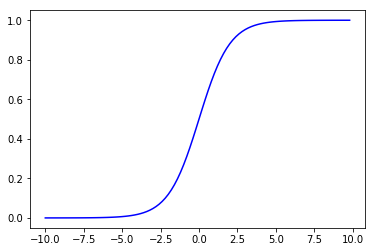

In [30]:
import numpy as np
import matplotlib.pyplot as plt
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x = np.arange(-10., 10., 0.2)
plt.plot(x, sigmoid(x), 'b', label='sigmoid')
plt.show()

> **Tip:** if you want to apply a sigmoid fuction to a Tensor `x` in Pytorch, you can simply call `x.sigmoid()`.

In NLP, we are often doing **classification**, rather than regression (predicting a value). So, even though the name can be misleading, logistic regression is a **classifier**: we have two output classes 0 and 1.

To get the 2 classes, we use the sigmoid function $\sigma$, so that the values coming out of our NN are between 0 and 1. You can see that in the picture above.



In [31]:
import torch.nn as nn
import torch.nn.functional as F


class ExampleNN(nn.Module):

    def __init__(self):
        super(ExampleNN, self).__init__()
        
        # an affine operation: y = xW + b
        self.output_layer = nn.Linear(3, 1, bias=True)
        
    def forward(self, x):
        x = self.output_layer(x)
        return x.sigmoid()

In [32]:
# create a model instance
torch.manual_seed(42)
model = ExampleNN()
print(model)

ExampleNN(
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)


Now, this is a very simple Neural Network! Actually, it is so simple maybe we should not call it a Neural network. But let's do so anyway.

This is what you should know: 

- when defining your Neural Net, you create a class that *inherits* from `nn.Module`. 
- We called our Neural Net `ExampleNN`.
- Parameters are defined within the `__init__` method. Here we defined a single **linear** layer. The parameters for that layer (a weight matrix $W$ and a bias term $b$) are added **automatically** to our parameter list.
- We define our computation in the `forward` function. In this case, we apply the linear layer to our input $\mathbf{x}$ and then a sigmoid function.

Let's check if our parameters are indeed as we expect them to be:

In [33]:
params = list(model.named_parameters())

for name, p in params:
    print(name, p)


output_layer.weight Parameter containing:
tensor([[ 0.4414,  0.4792, -0.1353]], requires_grad=True)
output_layer.bias Parameter containing:
tensor([0.5304], requires_grad=True)


You can see that:

- the first parameter is our weight matrix $W$, which is shaped $[1, 3]$.
- the second parameter is the bias term $b$, which is a scalar (a single value), since the weight matrix transforms our input $\mathbf{x}$ (with 3 elements) into a single scalar.

Observe that these parameters have been randomly initialized.

Now that we have our NN, we can feed it an input and see what comes out.
The input has to be a `Variable`. 

In [35]:
x = torch.randn(3, requires_grad=True)
print("input:", x)
out = model(x)
print("output:", out)

input: tensor([-0.1863,  2.2082, -0.6380], requires_grad=True)
output: tensor([0.8310], grad_fn=<SigmoidBackward>)


#### Loss 
Now we would like to use the `autograd` functionality to get gradients, but we first need a loss!
The loss will tell us how well our network is doing.

We're going to say that, for our input example, the **target** value is `0`. 
The target is what we wanted our network to **predict** for the input that we gave.

As our **loss** (or "criterion") we'll use the following two options:

##### Mean Squared Error

Mean Squared Error (MSE) is given by:

$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^N (o_i - t_i)^2 $$

I.e. it is the average, over elements $i$, of the squared difference of output $o_i$ with target $t_i$.
Since we have a single output value here, our loss is simply $(o - t)^2$.

##### Cross Entropy Loss

As there are only two output classes, we can use Binary Cross Entropy (BCE) Loss, which is given by:

$$ \text{BCE} = \frac{1}{N} \sum_{i=1}^N −(t_i \log(o_i)+(1−t_i)\log(1−o_i)) $$

BCE averages a different measure of the divergence between outputs and targets. For an individual sample $i$, it takes the following value:

$$
\displaystyle −(t_i \log(o_i)+(1−t_i)\log(1−o_i))  = \begin{cases} 
 −\log(1 - o_i) & \text{if $t_i = 0$}\\
 −\log(o_i) & \text{if $t_i = 1$} \\
 \end{cases}
 $$
 
Plotting these functions shows that Cross Entropy assigns a relatively high penalty to predictions that are very far from the target, while being more lenient to predictions that approach it:

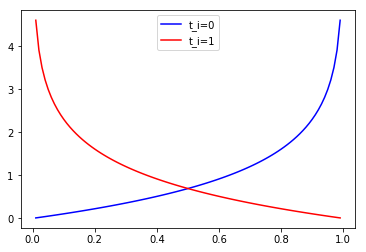

In [36]:
import numpy as np
import matplotlib.pyplot as plt
bce_0 = lambda x: - np.log(1 - x)
bce_1 = lambda x: - np.log(x)
x_array = np.arange(0.01, 1.0, 0.01)
plt.plot(x_array, bce_0(x_array), 'b', label='t_i=0')
plt.plot(x_array, bce_1(x_array), 'r', label='t_i=1')
plt.legend()
plt.show()

PyTorch offers Mean Squared Error and Cross Entropy (in addition to many other options) as built-in loss functions. 

**Let's calculate our loss:**

In [37]:
out = model(x)                # forward pass
target = torch.zeros(1)       # a dummy target (0.)

criterion_mse = nn.MSELoss()  # this is our MSE criterion
criterion_bce = nn.BCELoss()  # this is our Binary Cross Entropy criterion

loss_mse = criterion_mse(out, target)
loss_bce = criterion_bce(out, target)

print("output:", out)
print("MSE loss:", loss_mse)
print("BCE loss:", loss_bce)

output: tensor([0.8310], grad_fn=<SigmoidBackward>)
MSE loss: tensor(0.6905, grad_fn=<MseLossBackward>)
BCE loss: tensor(1.7777, grad_fn=<BinaryCrossEntropyBackward>)


### Gradient Descent 
Now we'll ask PyTorch to **update** the weights (parameters) of our neural network so that our next prediction is closer to that target.

We first need to zero-out all gradient tensors. `net.zero_grad()` will do this for all parameters. It will set `p.grad` to zeros for each parameter $p$.

We use MSE loss here, but you can try with BCE (or any other loss function) yourself. 

In [38]:
model.zero_grad()    # reset gradients
loss_mse.backward()  # compute gradients

# update weights
learning_rate = 0.5

# for each parameter, take a small step in the opposite dir of the gradient
for p in model.parameters():
    p.data = p.data - p.grad.data * learning_rate

Now, if we check the output for the same input vector $\mathbf{x}$, the output should be closer to the target:

In [39]:
new_out = model(x)
new_loss_mse = criterion_mse(new_out, target)

print("target:", target)
print("out:", out)
print("new out (should be closer to target):", new_out)

print("\nloss:", loss_mse)
print("new loss (should be lower):", new_loss_mse)

target: tensor([0.])
out: tensor([0.8310], grad_fn=<SigmoidBackward>)
new out (should be closer to target): tensor([0.7017], grad_fn=<SigmoidBackward>)

loss: tensor(0.6905, grad_fn=<MseLossBackward>)
new loss (should be lower): tensor(0.4923, grad_fn=<MseLossBackward>)


#### Using torch.optim

We just did a step of gradient descent manually, but in practice we would use an optimizer provided by PyTorch, from [torch.optim](https://pytorch.org/docs/stable/optim.html). The simplest one does exactly the same as what we just did.

Let's do the same update again, but now using the built-in SGD from PyTorch:


In [40]:
from torch import optim

# create a new model with the same parameters as before
# (because we use the same random seed)
torch.manual_seed(42)
model = ExampleNN()
print(model)

# define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.5)

# forward pass
new_out = model(x)

# loss
new_loss_mse = criterion_mse(new_out, target)

# backward pass
model.zero_grad()    # reset gradients
new_loss_mse.backward()  # compute gradients

# adjust weights using the optimizer
optimizer.step()

# compute new output after updating
new_out = model(x)
new_loss_mse = criterion_mse(new_out, target)

print("target:", target)
print("out:", out)
print("new out (should be closer to target):", new_out)

print("\nloss:", loss_mse)
print("new loss (should be lower):", new_loss_mse)

ExampleNN(
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)
target: tensor([0.])
out: tensor([0.8310], grad_fn=<SigmoidBackward>)
new out (should be closer to target): tensor([0.7017], grad_fn=<SigmoidBackward>)

loss: tensor(0.6905, grad_fn=<MseLossBackward>)
new loss (should be lower): tensor(0.4923, grad_fn=<MseLossBackward>)


**Observe** that using optim.SGD for 1 step had exactly the same effect as our manual update.

## Final notes

**Final note on optimizers**

The advantage of using an optimizer from `torch.optim` is that we can drop-in replace it with another, better optimizer that converges faster. We will do so in the practical. Just know that, in essence, everything it does comes down to taking a step in the opposite direction of the gradient, just like you just did manually!

**Final note on loss functions**

In this tutorial we played with 2 losses: MSE and Binary Cross Entropy. 
In the practical, our set of outputs will be 5 sentiment classes. We could map these to a value between 0 and 1 and use MSE, or (and this is what we will do), use a Cross Entropy Loss, with 5 classes. We will cover this loss in the lectures.

## This is it! You are now ready for Practical II.